# Active Subspace Analysis Notebook for SNL LES flame.

**DESCRIPTION**

This data set comes from an ensemble of large-eddy simulations of a combustion flame performed at Sandia National Labs' Combustion Research Facility. The input variables are the turbulence modeling/LES parameters. The outputs are a set of physical quantities at three different locations on the centerline.

**INPUTS (3)**

Variable | Lower bound | Upper bound | Density
--- | --- | --- | ---
Smagorinsky coefficient (Cs) | 0.0650 | 0.3460 | Uniform
Prandtl number (Pr_t) | 0.5 | 1.7 | Uniform
Schmidt number (Sc_t) | 0.5 | 1.7 | Uniform

**OUTPUTS (30)**

All outputs are taken at three different locations along the centerline. Both average and root-mean-squared quantities are available. Thus, each of the five quantities has six indices in the data matrix. 
Variable | Avg indices | RMS indices | Description
--- | --- | --- | --- 
T | 0-2 | 3-5 | Temperature
w | 6-8 | 9-11 | Vertical velocity component
mixFrac | 12-14 | 15-17 | Mixture fraction
P | 18-20 | 21-23 | Pressure 
rho | 24-26 | 27-29 | Density

**REFERENCES**

+ Khalil, Lacaze, Oefelein, and Najm. [Uncertainty quantification in LES of a turbulent bluff-body stabilized flame](http://www.sciencedirect.com/science/article/pii/S1540748914000339)
+ Constantine, Dow, and Wang. [Active Subspace Methods in Theory and Practice: Applications to Kriging Surfaces](http://epubs.siam.org/doi/abs/10.1137/130916138)

**CONTACT**

Questions or comments? Contact [Paul Constantine](mailto:pconstan@mines.edu)


In [1]:
import numpy as np
import pandas as pn
import active_subspaces as ac
%matplotlib inline

Import the data set, distinguish inputs (X) and outputs (F), and set the labels.

In [2]:
df = pn.DataFrame.from_csv('flameLES.txt')
data = df.as_matrix()
X = data[:,0:3]
F = data[:,3:]
M,m = X.shape
labels = df.keys()
in_labels = labels[:3]
out_labels = labels[3:]

Normalize the inputs to the interval [-1,1].

In [3]:
xl = np.array([0.065, 0.5, 0.5])
xu = np.array([0.346, 1.7, 1.7])
XX = ac.utils.misc.BoundedNormalizer(xl,xu).normalize(X)

Choose the output of interest.

In [4]:
out_index = 0 # anything between 0 and 29
f = F[:,out_index]
out_label = out_labels[out_index]

Run the check with the linear model.

In [5]:
ss = ac.subspaces.Subspaces()
ss.compute(f=f[:,np.newaxis],X=XX,sstype=5,nboot=200)

Display the one-dimensional sufficient summary plot.

/home/ryhoward/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


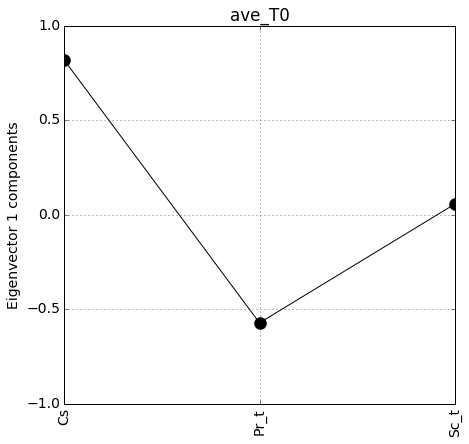

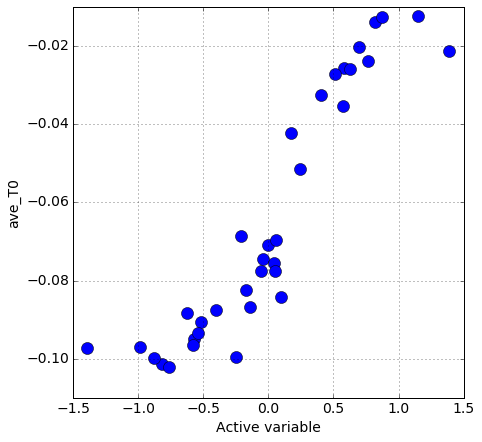

In [6]:
y = np.dot(XX,ss.W1) # active varsiables
ac.utils.plotters.eigenvectors(ss.W1,in_labels=in_labels,out_label=out_label)
ac.utils.plotters.sufficient_summary(y,f,out_label=out_label)

Get local linear gradients to approximate the active subspace.

In [7]:
G = ac.local_linear_gradients(XX,f)
ass = ac.subspaces.Subspaces()
ass.compute(df=G,nboot=2000)

Plot the active subspace.

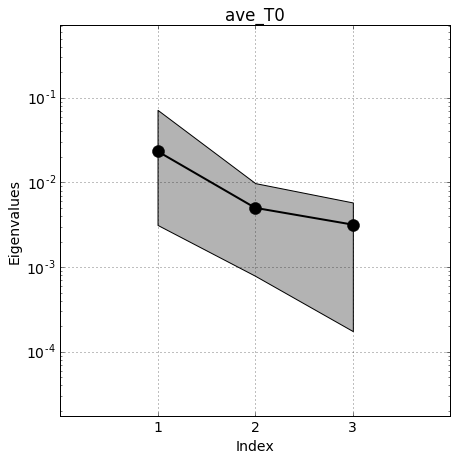

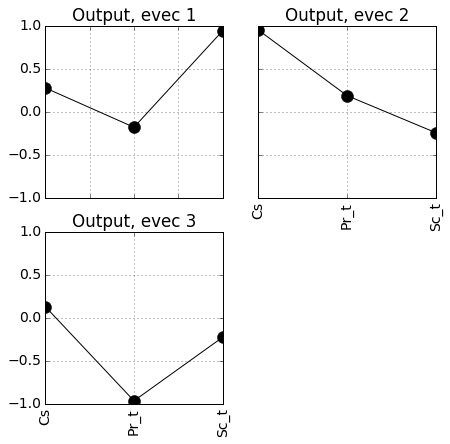

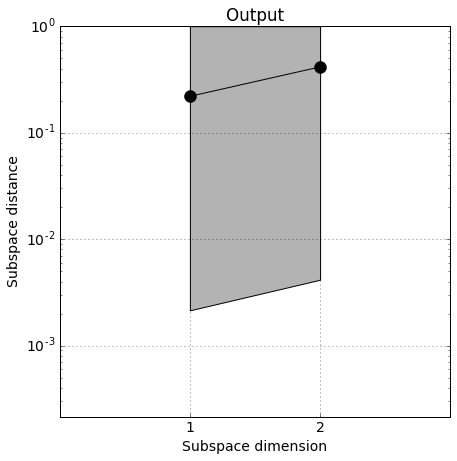

In [8]:
ac.utils.plotters.eigenvalues(ass.eigenvalues,ass.e_br,out_label=out_label)
ac.utils.plotters.eigenvectors(np.hstack((ass.W1,ass.W2)),in_labels=in_labels)
ac.utils.plotters.subspace_errors(ass.sub_br)

Sufficient summary plots. 

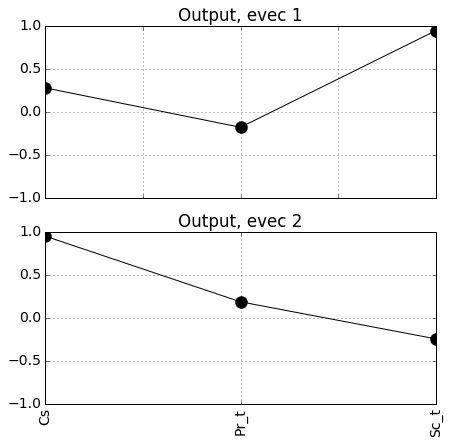

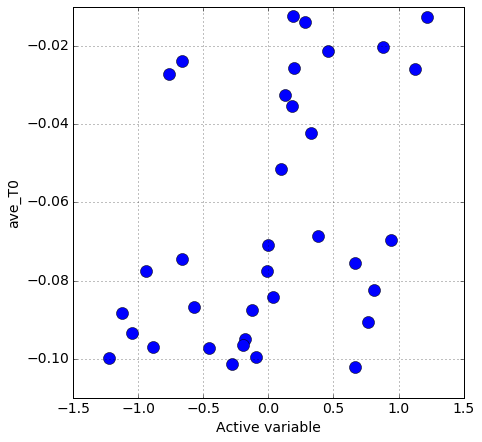

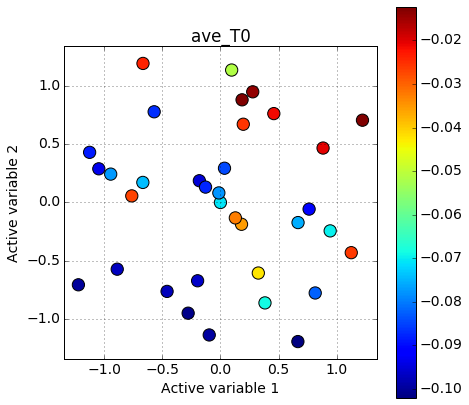

In [9]:
ass.partition(2)
y = np.dot(XX,ass.W1) # active variables
ac.utils.plotters.eigenvectors(ass.W1,in_labels=in_labels)
ac.utils.plotters.sufficient_summary(y,f,out_label=out_label)